<a href="https://colab.research.google.com/github/bam396/nyu-python-public-policy/blob/master/HW4_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 4 Coding: Analyzing and visualizing specific categories of 311 complaints

Create a new Google Colab notebook called "HW4".

**Problem Statement:** When comparing total 311 request counts per community district against the respective population, there seems to be a general trend that the higher the population, the higher the number of 311 requests. However, there is a lot of variance in the data. Maybe narrowing in on specific complaint type categories will help us better understand trends in 311 requests across the city.

"Noise" and "heat and hot water" were the most frequest requests in the entire 311 dataset. Let's try isolating the count of requests in each of those two categories versus all the other complaints.

**Step 1.** First you will need to prep your data to get the count of complaints in each of the three categories. 

In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:
1.   complaint_type = 'Noise - Residential'
2.   complaint_type = 'HEAT/HOT WATER'
3.   Everything else: (complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')

In [0]:
df['complaint_type'] = df['complaint_type'].str.lower()

In [0]:
cb_counts = df.groupby('community_board').size().reset_index(name='count_of_311_requests')

In [8]:
def recode_borocd_counts(row):
    if row.community_board[0] != 'U':
      if 'MANHATTAN' in row.community_board:
        return '1' + row.community_board[:2]
      elif 'BRONX' in row.community_board:
        return '2' + row.community_board[:2]
      elif 'BROOKLYN' in row.community_board:
        return '3' + row.community_board[:2]
      elif 'QUEENS' in row.community_board:
        return '4' + row.community_board[:2]
      elif 'STATEN ISLAND' in row.community_board:
        return '5' + row.community_board[:2]
    else:
      return 'Invalid borocd'

df['borocd'] = df.apply(recode_borocd_counts, axis=1)

# checking recode
df.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,homeless person assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111
1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,door/window,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109
2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308
3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105
4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412


In [0]:

# this function will recode the community_board value into borocd in a new column
  def recode_borocd_counts(row):
    if row.community_board[0] != 'U':
      if 'MANHATTAN' in row.community_board:
        return '1' + row.community_board[:2]
      elif 'BRONX' in row.community_board:
        return '2' + row.community_board[:2]
      elif 'BROOKLYN' in row.community_board:
        return '3' + row.community_board[:2]
      elif 'QUEENS' in row.community_board:
        return '4' + row.community_board[:2]
      elif 'STATEN ISLAND' in row.community_board:
        return '5' + row.community_board[:2]
    else:
      return 'Invalid borocd'

cb_counts['borocd'] = cb_counts.apply(recode_borocd_counts, axis=1)

In [0]:
merged_data = pd.merge(left=cb_counts, right=df, left_on=['borocd','community_board'], right_on=['borocd','community_board'])

In [11]:
merged_data_noise = merged_data[merged_data.complaint_type=='noise - residential']
merged_data_noise = merged_data_noise.groupby('borocd').size().reset_index(name='count_of_311_requests')
#checking code
print(len(merged_data_noise))

68


In [12]:
merged_data_heat = merged_data[merged_data.complaint_type=='heat/hot water']
merged_data_heat = merged_data_heat.groupby('borocd').size().reset_index(name='count_of_311_requests')
#checking code
print(len(merged_data_heat))

62


In [13]:
merged_data_else = merged_data[merged_data.complaint_type != 'noise - residential'][merged_data.complaint_type != 'heat/hot water']
merged_data_else = merged_data_else.groupby('borocd').size().reset_index(name='count_of_311_requests')
#checking code
print(len(merged_data_else))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


72


In [14]:
# per the starter template, checking all
merged_data_all = merged_data.groupby('borocd').size().reset_index(name='count_of_311_requests')
#checking code
print(len(merged_data_all))

72


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [16]:
merged_data_noise = merged_data_noise[merged_data_noise.borocd.isin(valid_borocds)]
print(len(merged_data_noise))

merged_data_heat = merged_data_heat[merged_data_heat.borocd.isin(valid_borocds)]
print(len(merged_data_heat))

merged_data_else = merged_data_else[merged_data_else.borocd.isin(valid_borocds)]
print(len(merged_data_else))

merged_data_all = merged_data_all[merged_data_all.borocd.isin(valid_borocds)]
print(len(merged_data_all))

59
59
59
59


**Step 2.** Create a stacked bar chart comprised of three stacked bars. The total height of each bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per CD.

1. number of 'Noise - Residential' complaints per CD
2. number of 'HEAT/HOT WATER' complaints per CD
3. number of other complaints per CD

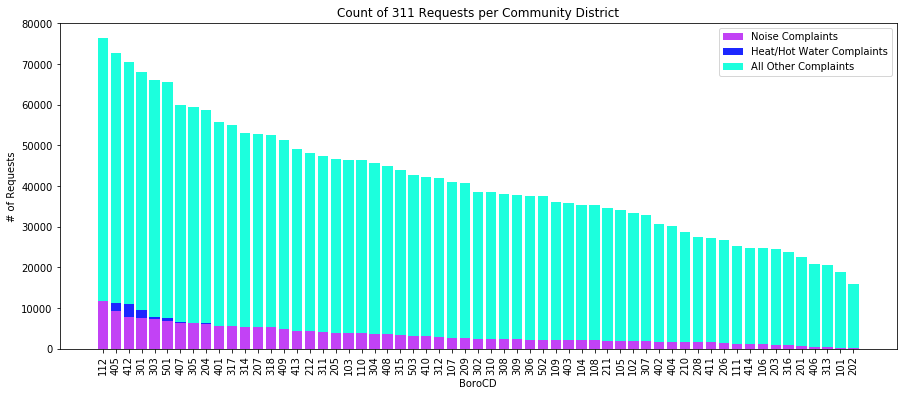

In [45]:
# list of bar positions on x axis
position_on_x = np.arange(len(merged_data_all))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly - this is particularly true for stacked bar charts
noise = np.array(merged_data_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
heat = np.array(merged_data_heat.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
other = np.array(merged_data_else.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

# creating an array (aka list) of test data so we can easily visualize how the stacking works
test_counts = np.full(len(merged_data_all),20000)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  noise,
  align='center',
  color='#c242f5',
  label='Noise Complaints'
)
# the order of the charts matters, if you don't include the "bottom" call, it it will stack your second chart on to the first
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  heat,
  bottom=noise, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='#1c27ff',
  label='Heat/Hot Water Complaints'
)
plot3 = plt.bar(
  position_on_x,
  other,
  bottom=heat, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='#1cffdd',
  label='All Other Complaints'
)
plt.xticks(position_on_x, merged_data_all.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

**Step 3.** Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts (y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.

In [18]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [0]:
# Create a function recode_borocd_pop that combines and recodes the Borough and CD Number values to create a borocd unique ID

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
merged_all = pd.merge(left=population, right=merged_data, left_on='borocd', right_on='borocd')

In [0]:
merged_data_noise = pd.merge(left=merged_data_noise, right=population, left_on='borocd', right_on='borocd')

In [0]:
merged_data_heat = pd.merge(left=merged_data_heat, right=population, left_on='borocd', right_on='borocd')

In [0]:
merged_data_else = pd.merge(left=merged_data_else, right=population, left_on='borocd', right_on='borocd')

In [0]:
noise_comp = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [merged_data_noise['2010 Population']/1000],
  # y = count of 311 requests
  [merged_data_noise['count_of_311_requests']]
]

heat_comp = [
  [merged_data_heat['2010 Population']/1000],
  # y = count of 311 requests
  [merged_data_heat['count_of_311_requests']]
]

other_comp = [
  [merged_data_else['2010 Population']/1000],
  # y = count of 311 requests
  [merged_data_else['count_of_311_requests']]
]

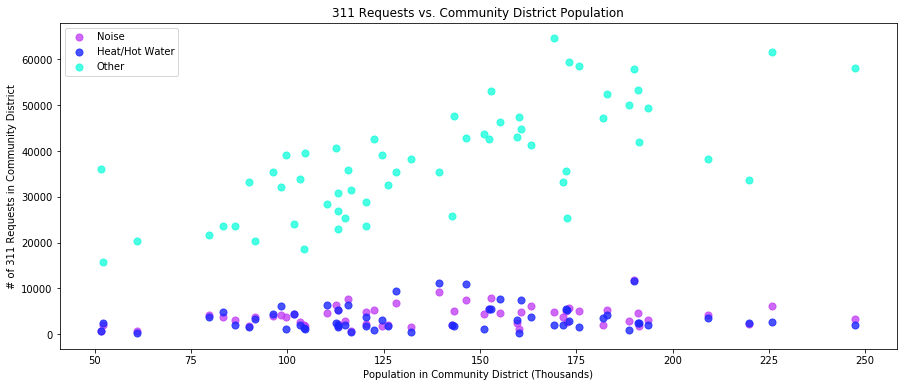

In [46]:
# define the color to be used for the markers for each data subset group
# they need to  be the order in which you defined your data sets
colors = ["#c242f5", "#1c27ff", "#1cffdd"]

# define the labels to be used for the data subset group
groups = ["Noise", "Heat/Hot Water", "Other"]

plt.figure(figsize=(15,6))

plt.scatter(
  noise_comp[0],
  noise_comp[1],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)
# each new plot gets rendered on top of the previous one
plt.scatter(
  heat_comp[0],
  heat_comp[1],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  other_comp[0],
  other_comp[1],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)


plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
# the legend automatically finds each of the legends from each of the previous scatter plots
plt.legend(loc=2)

plt.show()

# Review Question 1

Does it seem like there's a positive correlation between population and noise complaints or population and heat/water complaints?

No, it does not

# Review Question 2
 What's a possible explanation for the relationship or lack of relationship?

 It could be a case of "[bystander effect](https://en.wikipedia.org/wiki/Bystander_effect)" -- when there are more people around, people are less likely to report a problem, under the assumption that other individuals will handle it. 